In [87]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [88]:
data_original = pd.read_csv('heart.csv', index_col=0)
data_copy = pd.read_csv('heart.csv', index_col=0)
data_original.head(5)

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,,,,,,,,,,,,,
63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [89]:
def feature_scaling(column):
    
    x_mean = np.mean(column)
    x_std = np.std(column)
    column = column.map(lambda x: (x - x_mean) / x_std)
    return column

In [90]:
# The Predictor and the target variable
Y = data_copy['target']

data_copy['trestbps'] = feature_scaling(data_copy['trestbps'])
data_copy['chol'] = feature_scaling(data_copy['chol'])
data_copy['thalach'] = feature_scaling(data_copy['thalach'])
data_copy['oldpeak'] = feature_scaling(data_copy['oldpeak'])


x = data_copy[['trestbps', 'chol', 'thalach', 'oldpeak']]
m = x.shape[0]
x = np.concatenate((np.ones((m,1)),x), axis=1) 
n = x.shape[1]
theta = np.random.random(size=(1,n))*0.1
Y = Y.values.reshape(m,1)

In [91]:
data_copy.head(5)

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,,,,,,,,,,,,,
63,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
37,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
41,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
56,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
57,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


In [92]:
def hypothesis(*args):
    theta = args[0]
    hypo = (1 / (1 + np.exp(-np.dot(x, np.transpose(theta)))))
    return hypo

In [93]:
print(hypothesis(theta))

[[0.53176436]
 [0.56361648]
 [0.51613874]
 [0.5184645 ]
 [0.55021387]
 [0.49338856]
 [0.5448138 ]
 [0.51831282]
 [0.54214698]
 [0.52621102]
 [0.52846862]
 [0.50622608]
 [0.53306412]
 [0.47749393]
 [0.55603324]
 [0.50132083]
 [0.54752085]
 [0.50615452]
 [0.55364597]
 [0.52570616]
 [0.51647841]
 [0.52531958]
 [0.52891087]
 [0.51935032]
 [0.5296855 ]
 [0.56885174]
 [0.52902233]
 [0.43614332]
 [0.59146052]
 [0.49479621]
 [0.47295111]
 [0.45991536]
 [0.52422676]
 [0.51368968]
 [0.47457085]
 [0.50789979]
 [0.54737211]
 [0.54357843]
 [0.54238981]
 [0.58510595]
 [0.54260484]
 [0.52923874]
 [0.48318001]
 [0.5069322 ]
 [0.56914402]
 [0.54329779]
 [0.53411708]
 [0.52032086]
 [0.45909527]
 [0.51470523]
 [0.50970028]
 [0.5181743 ]
 [0.50790362]
 [0.46457992]
 [0.52879087]
 [0.50238857]
 [0.51536512]
 [0.52209699]
 [0.48532455]
 [0.53043594]
 [0.4721842 ]
 [0.50939288]
 [0.50047284]
 [0.47566832]
 [0.5120221 ]
 [0.52473393]
 [0.46568389]
 [0.52394251]
 [0.49891315]
 [0.49283443]
 [0.49753335]
 [0.46

In [94]:
def cost_func(hypo, y, m):
    sum = 0
    for i in range(m):
        sum += y[i]*math.log(hypo[i]) + (1-y[i])*math.log(1-hypo[i])
    sum = -sum / m
    return sum

In [95]:
def gradient_decent(iterations, learning_rate, theta):
    errors = []
    for i in range(iterations):
        hypo = hypothesis(theta)
        theta = theta - (learning_rate/m) * np.dot(np.transpose(hypo - Y) , x)
        error = cost_func(hypo, Y, m)
        errors.append(error[0])
        #print("Error" , error[0])
        #print(f"The new theta list {theta}")
        #print(hypo)
    return errors

In [96]:
# learning rate of 0.01
iterations = 10000
learning_rate = 0.01
errors = gradient_decent(iterations, learning_rate, theta)

Text(0, 0.5, 'Cost Function')

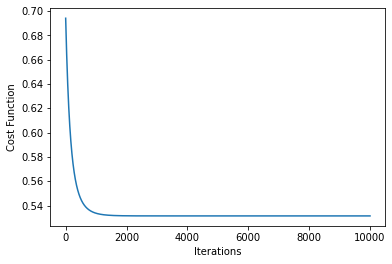

In [97]:
plt.plot(np.arange(iterations), errors)
plt.xlabel('Iterations')
plt.ylabel('Cost Function')

In [98]:
def feature_scaling_predict(column):
    
    x_mean = np.mean(column)
    x_std = np.std(column)
    return (column - x_mean) / x_std

In [99]:
values = data_copy[['trestbps', 'chol', 'thalach', 'oldpeak']]
values = np.concatenate((np.ones((m,1)),values), axis=1) 
predicted = np.dot(values, np.transpose(theta))
for i in range(len(predicted)):
    if predicted[i][0] > 0:
        predicted[i][0] = 1.0
    else:
        predicted[i][0] = 0.0
data_original['predicted'] = predicted
print(data_original)

     sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
age                                                                          
63     1   3       145   233    1        0      150      0      2.3      0   
37     1   2       130   250    0        1      187      0      3.5      0   
41     0   1       130   204    0        0      172      0      1.4      2   
56     1   1       120   236    0        1      178      0      0.8      2   
57     0   0       120   354    0        1      163      1      0.6      2   
..   ...  ..       ...   ...  ...      ...      ...    ...      ...    ...   
57     0   0       140   241    0        1      123      1      0.2      1   
45     1   3       110   264    0        1      132      0      1.2      1   
68     1   0       144   193    1        1      141      0      3.4      1   
57     1   0       130   131    0        1      115      1      1.2      1   
57     0   1       130   236    0        0      174      0      